# Parametric Screw Conveyor

main function: move Material from A to B

high level design parameters: 

- mass flow
- storage volume


## Requirements:
- easy to maintain
- use standardized parts where possible
- look for 

In [ ]:
# Paramters

parameters = {'lenght' : 1, # m 
              'width'  : 1, # m
              'height' : 1, # m
            }

In [ ]:
from pathlib import Path
data_path = ''

In [3]:
# export parameters as .yaml
import yaml

par_file = Path(data_path + 'par_file.yml')
with open(par_file, 'w') as outfile:
    yaml.dump(parameters, outfile, default_flow_style=False)

In [6]:
# export parameters as .json 
import json

par_file = Path(data_path + 'par_file.json')
with open(par_file, 'w') as outfile:
    json.dump(parameters, outfile)


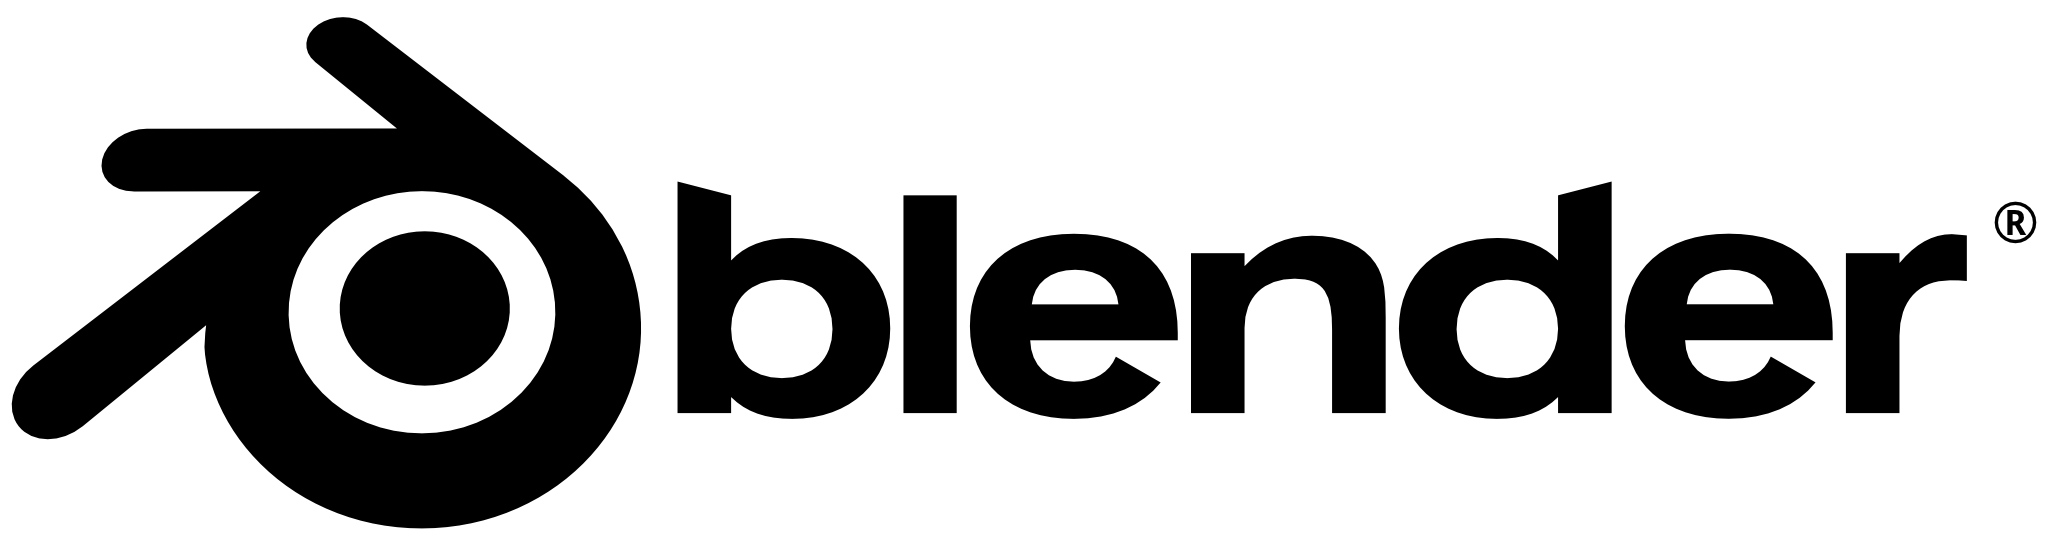

In [9]:
from IPython import display
display.Image("./images/blender_logo_no_socket_black.png")